# Лабораторная работа 8. Построение пайплайна одномерной регрессии

## Подключение библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Загрузка данных и разделение на матрицу признаков и зависимую переменную

In [ ]:
dataset = pd.read_csv('forestfires.csv')
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[7 5 'mar' 'fri' 86.2 26.2 94.3 5.1 8.2 51 6.7 0.0]
 [7 4 'oct' 'tue' 90.6 35.4 669.1 6.7 18.0 33 0.9 0.0]
 [7 4 'oct' 'sat' 90.6 43.7 686.9 6.7 14.6 33 1.3 0.0]
 [8 6 'mar' 'fri' 91.7 33.3 77.5 9.0 8.3 97 4.0 0.2]
 [8 6 'mar' 'sun' 89.3 51.3 102.2 9.6 11.4 99 1.8 0.0]]
Зависимая переменная
[5 4 4 6 6]


## Обработка пропущенных значений (если требуется)

In [ ]:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])
# print(X)

## Обработка категориальных данных (если требуется)

### Замена категории кодом (LabelEncoder)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = dataset['day']

labelencoder_y = LabelEncoder()

print("Зависимая переменная до обработки")

print(y.unique())

y = labelencoder_y.fit_transform(y)

print("Зависимая переменная после обработки")

print(y)

### Применение OneHotEncoder

In [ ]:
 X_dirty = dataset[['month', 'day', 'FFMC', 'DMC']]

 from sklearn.preprocessing import OneHotEncoder
 from sklearn.compose import ColumnTransformer
 labelencoder_X = LabelEncoder()

 transformers = [
    ('encoder', OneHotEncoder(), ['month', 'day']),  # Применяем OneHotEncoder к категориальным столбцам month и day
]


 # Создаем объект ColumnTransformer и передаем ему список трансформеров
 ct = ColumnTransformer(transformers, remainder='passthrough', verbose_feature_names_out=False)

 # Выполняем трансформацию признаков
 X_transformed = ct.fit_transform(X_dirty)

 print(X_transformed)

  (0, 7)	1.0
  (0, 12)	1.0
  (0, 19)	86.2
  (0, 20)	26.2
  (1, 10)	1.0
  (1, 17)	1.0
  (1, 19)	90.6
  (1, 20)	35.4
  (2, 10)	1.0
  (2, 14)	1.0
  (2, 19)	90.6
  (2, 20)	43.7
  (3, 7)	1.0
  (3, 12)	1.0
  (3, 19)	91.7
  (3, 20)	33.3
  (4, 7)	1.0
  (4, 15)	1.0
  (4, 19)	89.3
  (4, 20)	51.3
  (5, 1)	1.0
  (5, 15)	1.0
  (5, 19)	92.3
  (5, 20)	85.3
  (6, 1)	1.0
  :	:
  (510, 20)	166.9
  (511, 1)	1.0
  (511, 15)	1.0
  (511, 19)	81.6
  (511, 20)	56.7
  (512, 1)	1.0
  (512, 15)	1.0
  (512, 19)	81.6
  (512, 20)	56.7
  (513, 1)	1.0
  (513, 15)	1.0
  (513, 19)	81.6
  (513, 20)	56.7
  (514, 1)	1.0
  (514, 15)	1.0
  (514, 19)	81.6
  (514, 20)	56.7
  (515, 1)	1.0
  (515, 14)	1.0
  (515, 19)	94.4
  (515, 20)	146.0
  (516, 9)	1.0
  (516, 17)	1.0
  (516, 19)	79.5
  (516, 20)	3.0


## Разделение выборки на тестовую и тренировочную

In [ ]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 1/4, random_state = 0)
print("X_train[:, 0] shape:", X_train[:, 0].shape)

print("y_train shape:", y_train.shape)
print("X_train[:, 0] shape:", X_test[:, 0].shape)

print("y_train shape:", y_test.shape)

X_train[:, 0] shape: (387, 1)
y_train shape: (387,)
X_train[:, 0] shape: (130, 1)
y_train shape: (130,)


## Обучение линейной модели регрессии

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Предсказание, обработка и визуализация результатов

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[4.68595432 4.64332766 4.10530536 4.30777154 4.37104161 3.98979654
 4.59204023 4.31985871 4.44938084 3.79576868 4.40136091 5.10264141
 4.76915948 4.60393193 4.44244285 3.99850077 4.06655699 4.01735184
 3.98438004 4.71998817 4.28385525 3.98836934 3.6893342  4.10530536
 4.56197289 4.35796287 4.15276695 3.97192373 4.26625506 3.96282894
 4.10751803 4.33269522 3.95462449 4.11130553 4.52016134 4.23362655
 4.39367951 4.0768059  4.03226847 4.13309105 4.19855224 3.80463814
 4.08054734 3.94464019 4.08319372 3.94572744 5.24228012 3.96282894
 4.29888875 3.90156358 4.0253183  4.0664485  4.71013373 4.17549463
 4.10530536 4.15329482 3.94137749 4.42063495 3.90156358 4.14380515
 4.04718426 4.20242836 4.71591171 4.17682549 4.22914535 4.03226847
 4.14380515 4.33269522 3.67666389 3.88613006 3.80463814 4.08319372
 3.94464019 4.33396046 4.30777154 4.65822764 4.44244285 4.21854787
 3.90156358 3.90156358 4.04590001 4.24504289 4.3978746  3.9172935
 4.88851664 4.19855224 4.71998817 3.98836934 4.38284401 4.10751

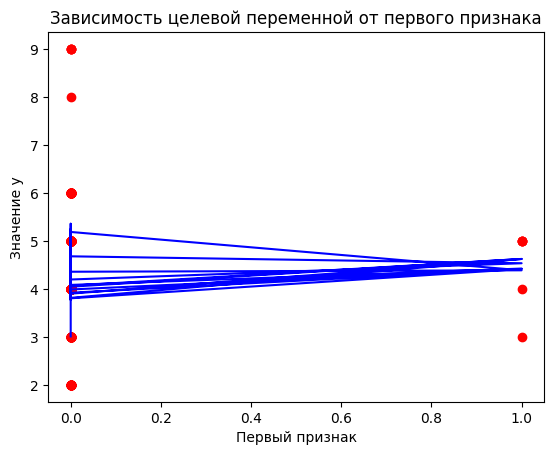

In [ ]:
# Преобразование csr_matrix в NumPy массив
X_train_dense = X_train.toarray()

# Теперь можно применить ravel() к первому столбцу

X_train_0 = X_train_dense[:, 0].ravel()
plt.scatter(X_train_0, y_train, color='red')
plt.plot(X_train_0, regressor.predict(X_train), color='blue')

plt.title('Зависимость целевой переменной от первого признака')

plt.xlabel('Первый признак')

plt.ylabel('Значение y')

plt.show()

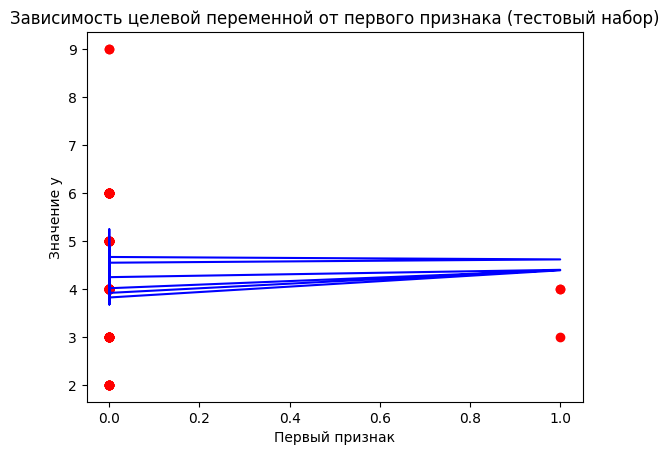

In [ ]:
# Преобразование csr_matrix в NumPy массив
X_test_dense = X_test.toarray()

# Преобразование данных к одномерному массиву
X_test_0 = X_test_dense[:, 0].ravel()

# Получение предсказаний для тестовой выборки
y_pred_test = regressor.predict(X_test_dense)

plt.scatter(X_test_0, y_test, color='red')
plt.plot(X_test_0, y_pred_test, color='blue')
plt.title('Зависимость целевой переменной от первого признака (тестовый набор)')
plt.xlabel('Первый признак')
plt.ylabel('Значение y')
plt.show()